In [ ]:
import pandas as pd 
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Generacion de tabla

In [ ]:
# Cargo la tabla con información de los tiempos
df= pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial/segundo año/cuarto/PP2/trabajos/tecleado/tiempos_por_tecla (1).csv')
df.head() 

,tiempo_id,usuario,practica,tecla,up,down,anterior,anterior_down,modo
0,1,1,1,69,43,0,0,0,1
1,2,1,1,83,237,157,69,0,1
2,3,1,1,84,458,330,83,157,1
3,4,1,1,65,571,426,84,330,1
4,5,1,1,32,650,572,65,426,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263895 entries, 0 to 263894
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   tiempo_id      263895 non-null  int64
 1   usuario        263895 non-null  int64
 2   practica       263895 non-null  int64
 3   tecla          263895 non-null  int64
 4   up             263895 non-null  int64
 5   down           263895 non-null  int64
 6   anterior       263895 non-null  int64
 7   anterior_down  263895 non-null  int64
 8   modo           263895 non-null  int64
dtypes: int64(9)
memory usage: 18.1 MB


In [ ]:
#Cargo la tabla con información de los nombres de usuarios.
df2 = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial/segundo año/cuarto/PP2/trabajos/tecleado/usuarios.csv')
df2.head()

,usuario_id,usuario,dni,app_codigo,app_codigo_generado,app_password,a9_password,a9_forzar_cambio,mail
0,1,GARAYZABAL Diego,23197417,280473.0,9602213.0,2984784.0,ece3840c6f0fdbc1996f5cbefd6d04ea,0,dgarayzabal@gmail.com
1,62,RICARDO PIÑA,17385722,0.0,8294247.0,NaN,e39619f1b9de010969d611274e7397d7,0,ricardo.pina@gmail.com
2,64,DIEGO OBREGóN,23196174,NaN,3191580.0,NaN,e10adc3949ba59abbe56e057f20f883e,0,diego.obregon.k@gmail.com
3,65,FEDERICO CORAGLIO,39173836,NaN,5853264.0,NaN,61d23a022e9a3777b015dea832fab2e3,0,fedecoraglio@hotmail.com
4,66,CéSAR LUIS GUZMáN,26904898,NaN,4119381.0,NaN,ccb99a52e750c64342844bd59c7a24cd,0,cesarluisg@gmail.com


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   usuario_id           45 non-null     int64  
 1   usuario              45 non-null     object 
 2   dni                  45 non-null     int64  
 3   app_codigo           2 non-null      float64
 4   app_codigo_generado  43 non-null     float64
 5   app_password         1 non-null      float64
 6   a9_password          45 non-null     object 
 7   a9_forzar_cambio     45 non-null     int64  
 8   mail                 45 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 3.3+ KB


In [ ]:
#Cambio de nombre las columnas usuario_id y usuarios para que al momento de unir las tablas, se unan de forma correcta
df2=df2.rename(columns={'usuario_id':'usuario','usuario':'nombre'})

In [ ]:
# Uno las tablas y elimino las columnas que no me interesan
tabla = pd.merge(df,df2)
tabla.drop(['dni','app_codigo','app_codigo_generado','app_password','a9_password','a9_forzar_cambio','mail','tiempo_id'],axis=1,inplace=True)
tabla.head()

,usuario,practica,tecla,up,down,anterior,anterior_down,modo,nombre
0,1,1,69,43,0,0,0,1,GARAYZABAL Diego
1,1,1,83,237,157,69,0,1,GARAYZABAL Diego
2,1,1,84,458,330,83,157,1,GARAYZABAL Diego
3,1,1,65,571,426,84,330,1,GARAYZABAL Diego
4,1,1,32,650,572,65,426,1,GARAYZABAL Diego


In [ ]:
# Elimino las filas con modo igual a 3
tabla.query("modo ==1  ",inplace=True)
tabla

,usuario,practica,tecla,up,down,anterior,anterior_down,modo,nombre
0,1,1,69,43,0,0,0,1,GARAYZABAL Diego
1,1,1,83,237,157,69,0,1,GARAYZABAL Diego
2,1,1,84,458,330,83,157,1,GARAYZABAL Diego
3,1,1,65,571,426,84,330,1,GARAYZABAL Diego
4,1,1,32,650,572,65,426,1,GARAYZABAL Diego
...,...,...,...,...,...,...,...,...,...
263394,105,10,65,56207,56102,85,56031,1,LAUTARO SANTOS
263395,105,10,82,56366,56297,65,56102,1,LAUTARO SANTOS
263396,105,10,73,56470,56407,82,56297,1,LAUTARO SANTOS
263397,105,10,79,56654,56542,73,56407,1,LAUTARO SANTOS


In [ ]:
# Paso los datos con las teclas de código ASCCI a tipo numérico
tabla['tecla'] = tabla['tecla'].map(chr)
tabla['anterior'] = tabla['anterior'].map(chr)

In [ ]:
tabla.head()

,usuario,practica,tecla,up,down,anterior,anterior_down,modo,nombre
0,1,1,E,43,0, ,0,1,GARAYZABAL Diego
1,1,1,S,237,157,E,0,1,GARAYZABAL Diego
2,1,1,T,458,330,S,157,1,GARAYZABAL Diego
3,1,1,A,571,426,T,330,1,GARAYZABAL Diego
4,1,1,,650,572,A,426,1,GARAYZABAL Diego


#### Cantidad de practicas maximas

In [ ]:
# Para analizar cual es la cantidad maxima o minima de practicas realizo un grupo de la tabla y que me traiga la cantidad maxima 
# de practicas realizadas por cada usuario y modo.
grupo=tabla.groupby(['usuario'])['practica'].max().reset_index(name='cant_max')
grupo.head(3)

,usuario,cant_max
0,1,25
1,62,16
2,64,39


15.363958119698214 15.947368421052632


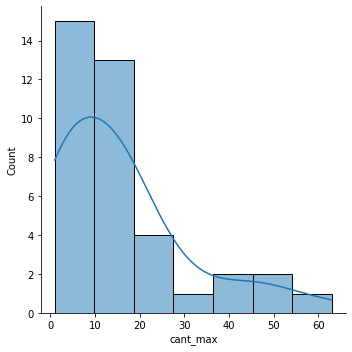

In [ ]:
# Genero la gráfica con el modo 1
import seaborn as sns
desv=(grupo['cant_max'].std())
media=grupo['cant_max'].mean()
print(desv, media)
sns.displot(grupo['cant_max'], kde=True)

mediante el proceso de inversa normal (calcular en el libro) se obtuvo que la cantidad maxima de pruebas para el modo 1 es igual a 33 para obtener un 68% de veracidad de los datos

In [ ]:
# Uno las tablas de grupo a la tabla original para así obtener por usuario el numero maximo de practicas y eliminar a los usuarios con
# practicas menores a 5 o mayores a 33
tabla=tabla.merge(grupo)
tabla=tabla.loc[(tabla['cant_max']>=5) & (tabla['cant_max']<=33)]
tabla.drop(['cant_max'],axis=1,inplace=True)
tabla.head(3)

,usuario,practica,tecla,up,down,anterior,anterior_down,modo,nombre
0,1,1,E,43,0, ,0,1,GARAYZABAL Diego
1,1,1,S,237,157,E,0,1,GARAYZABAL Diego
2,1,1,T,458,330,S,157,1,GARAYZABAL Diego


#### outlayers up y down

In [ ]:
grupo1=tabla.groupby(['usuario','practica','tecla'])['up','down'].mean().reset_index()
grupo1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,usuario,practica,tecla,up,down
0,1,1,,24767.838710,24686.322581
1,1,1,A,25924.666667,25771.400000
2,1,1,C,26615.333333,26512.333333
3,1,1,D,24809.666667,24720.000000
4,1,1,E,20302.250000,20222.833333
...,...,...,...,...,...
5110,106,14,Q,28589.000000,28461.666667
5111,106,14,R,26720.500000,26626.312500
5112,106,14,S,16333.000000,16189.875000
5113,106,14,T,28608.000000,28503.333333


In [ ]:
import plotly.express as px
fig = px.box(grupo1, x="tecla", y="up", color="usuario")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(grupo1, x="tecla", y="down", color="usuario")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
grupo2=tabla.groupby(['usuario','practica','combinacion'])['up','down'].mean().reset_index()
grupo2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,usuario,practica,combinacion,up,down
0,1,1,/A,35086.666667,34937.333333
1,1,1,/C,30180.333333,30058.333333
2,1,1,/D,24809.666667,24720.000000
3,1,1,/E,18714.000000,18647.200000
4,1,1,/L,21738.333333,21621.666667
...,...,...,...,...,...
9543,106,14,R/I,30203.200000,30097.800000
9544,106,14,S/,22214.400000,22125.000000
9545,106,14,S/C,22949.666667,22832.333333
9546,106,14,T/A,23199.666667,23061.666667


In [ ]:
import plotly.express as px
fig = px.box(grupo2, x="combinacion", y="down", color="usuario")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(grupo2, x="combinacion", y="up", color="usuario")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
tabla

,usuario,practica,tecla,up,down,anterior,anterior_down,modo,nombre
0,1,1,E,43,0, ,0,1,GARAYZABAL Diego
1,1,1,S,237,157,E,0,1,GARAYZABAL Diego
2,1,1,T,458,330,S,157,1,GARAYZABAL Diego
3,1,1,A,571,426,T,330,1,GARAYZABAL Diego
4,1,1,,650,572,A,426,1,GARAYZABAL Diego
...,...,...,...,...,...,...,...,...,...
152101,105,10,A,56207,56102,U,56031,1,LAUTARO SANTOS
152102,105,10,R,56366,56297,A,56102,1,LAUTARO SANTOS
152103,105,10,I,56470,56407,R,56297,1,LAUTARO SANTOS
152104,105,10,O,56654,56542,I,56407,1,LAUTARO SANTOS


In [ ]:
Df= pd.DataFrame()
for usuario in tabla['usuario']:
  for tecla in tabla['tecla']:
    x=(tabla['up'].mean())
type(x)

falta filtrar

In [ ]:
np.count_nonzero(grupo1['usuario'].unique())

25

In [ ]:
df[df.groupby("ReportDate").TotalVolume.\
      transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]

KeyError: ignored

In [ ]:
x=grupo1[grupo1.groupby(["usuario","practica"]).up.\
      transform(lambda x : (x<x.quantile(0.75))|(x>(x.quantile(0.25)))).eq(1)]

In [ ]:
x['usuario'].unique()

In [ ]:
import scipy.stats as stats
Q1 = grupo1['up'].quantile (q = .25)
Q3 = grupo1['up'].quantile (q = .75)
IQR = grupo1['up'].apply (stats.iqr)
data_clean = grupo1 [~ ((grupo1['up'] <(Q1-1.5 * IQR)) | (grupo1['up']> (Q3 + 1.5 * IQR)))]
data_clean

In [ ]:
import plotly.express as px
fig = px.box(data_clean, x="modo", y="up", color="usuario")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
np.count_nonzero(data_clean['usuario'].unique())

#### Tiempo de tecla apretada ✅

In [ ]:
# Para generar el tiempo que tarda manteniendo la tecla apretada resto 
tabla['tecla_apretadas']=tabla['up']-tabla['down']
tabla

,usuario,practica,tecla,up,down,anterior,anterior_down,modo,nombre,tecla_apretadas
0,1,1,E,43,0, ,0,1,GARAYZABAL Diego,43
1,1,1,S,237,157,E,0,1,GARAYZABAL Diego,80
2,1,1,T,458,330,S,157,1,GARAYZABAL Diego,128
3,1,1,A,571,426,T,330,1,GARAYZABAL Diego,145
4,1,1,,650,572,A,426,1,GARAYZABAL Diego,78
...,...,...,...,...,...,...,...,...,...,...
152101,105,10,A,56207,56102,U,56031,1,LAUTARO SANTOS,105
152102,105,10,R,56366,56297,A,56102,1,LAUTARO SANTOS,69
152103,105,10,I,56470,56407,R,56297,1,LAUTARO SANTOS,63
152104,105,10,O,56654,56542,I,56407,1,LAUTARO SANTOS,112


In [ ]:
# Para observar si hay errores en datos, agrupo por usuario, numero de practicas, modo y tecla contando el promedio en que se 
# apreta esa tecla.
grupo_prom=tabla.groupby(['usuario','practica','tecla'])['tecla_apretadas'].mean().reset_index()
# Para que la grafica se pueda entender mejor, solo traigo datos de los usuarios con numero de practicas iguales a 5
grupo_prom=grupo_prom.loc[grupo_prom['practica']==5]

In [ ]:
import plotly.express as px
fig = px.scatter(grupo_prom, x="tecla", y="tecla_apretadas", color='usuario')
fig.show()

In [ ]:
# Gracias a la grafica se pudo ver que las teclas que estan en la siguiente lista cuentan con promedios igual a 0, tratandose de un 
# posible error, por lo que se los decide eliminar.
non= [',','.','0','1','3','4','5','6','7','8','9']
tabla=tabla.loc[~tabla['tecla'].isin(non)]
tabla=tabla.loc[~tabla['anterior'].isin(non)]
tabla.head(3)

,usuario,practica,tecla,up,down,anterior,anterior_down,modo,nombre,tecla_apretadas
0,1,1,E,43,0, ,0,1,GARAYZABAL Diego,43
1,1,1,S,237,157,E,0,1,GARAYZABAL Diego,80
2,1,1,T,458,330,S,157,1,GARAYZABAL Diego,128


#### tiempo entre tecla y tecla

In [ ]:
# Para el delay entre grupo de tecas genero una columna con la combinación dorrespondiente
tabla['combinacion']= tabla['anterior']+'/'+tabla['tecla']
tabla.head(3)

,usuario,practica,tecla,up,down,anterior,anterior_down,modo,nombre,tecla_apretadas,combinacion
0,1,1,E,43,0, ,0,1,GARAYZABAL Diego,43, /E
1,1,1,S,237,157,E,0,1,GARAYZABAL Diego,80,E/S
2,1,1,T,458,330,S,157,1,GARAYZABAL Diego,128,S/T


In [ ]:
# Para sacar el delay que tiene una persona entre teclas resto el tiempo de down con anterior down
tabla['Delay_Teclas']=tabla['down']-tabla['anterior_down']

In [ ]:
# Para analizar que cantidad de veces se repite una combinacion en la frase, genero un grupo que cuente las veces que se repite, luego
# lo uno a la tabla para así despues poder filtrar las combinaciones con pocas repeticiones.
x=tabla.groupby(['usuario','practica'])['combinacion'].value_counts().reset_index(name='cant')
tabla=tabla.merge(x)
tabla['cant'].value_counts()

1     18073
3     16368
2     15004
5      8525
6      4092
11     3751
8      2728
4      2728
7      2387
Name: cant, dtype: int64

In [ ]:
#Elimino las combinaciones que tienen maximo 2 repeticiones en toda la frace.
tabla=tabla.loc[~(tabla['cant']<=2)].sort_values(['usuario','practica','modo','down'])
tabla.drop(['cant'],axis=1,inplace=True)
tabla

,usuario,practica,tecla,up,down,anterior,anterior_down,modo,nombre,tecla_apretadas,combinacion,Delay_Teclas
1,1,1,S,237,157,E,0,1,GARAYZABAL Diego,80,E/S,157
10,1,1,A,571,426,T,330,1,GARAYZABAL Diego,145,T/A,96
13,1,1,,650,572,A,426,1,GARAYZABAL Diego,78,A/,146
24,1,1,E,778,714,,572,1,GARAYZABAL Diego,64,/E,142
2,1,1,S,970,858,E,714,1,GARAYZABAL Diego,112,E/S,144
...,...,...,...,...,...,...,...,...,...,...,...,...
69223,106,14,R,48816,48720,A,48624,1,GINO SIBELLO,96,A/R,96
69230,106,14,,48928,48832,R,48720,1,GINO SIBELLO,96,R/,112
69260,106,14,A,49072,48952,,48832,1,GINO SIBELLO,120,/A,120
69224,106,14,R,50272,50184,A,49871,1,GINO SIBELLO,88,A/R,313


Graficas para observar las medias observando el numero de practicas por usuario

In [ ]:
#Genero un grupo por usuario, practica, modo y combinacion, trayendo el promedio de Delay_Teclas
grupo3=tabla.groupby(['usuario','practica','combinacion'])['Delay_Teclas'].mean().reset_index(name='prom')
grupo3.head(3)

,usuario,practica,combinacion,prom
0,1,1,/A,260.000000
1,1,1,/C,165.666667
2,1,1,/D,122.333333


In [ ]:
modo1= grupo3.loc[(grupo3['usuario']==93)]
modo1.head(3)

,usuario,practica,combinacion,prom
7252,93,1,/A,218.666667
7253,93,1,/C,253.666667
7254,93,1,/D,143.666667


In [ ]:
import plotly.express as px
fig = px.line(modo1, x="combinacion", y="prom", color='practica')
fig.show()

Se puede observar que tienen una tendencia a juntarse en un punto, el cual será el deseado a pronosticar para la identificación del usuario.

#### pivoteo de tabla

In [ ]:
df_letras=tabla[['usuario','practica','tecla','tecla_apretadas']]
df_letras=df_letras.rename(columns={'tecla':'letra'})
df_letras.head(3)

,usuario,practica,letra,tecla_apretadas
1,1,1,S,80
10,1,1,A,145
13,1,1,,78


In [ ]:
df_concatenacion=tabla[['usuario','practica','combinacion','Delay_Teclas']]
df_concatenacion=df_concatenacion.rename(columns={'combinacion':'letra'})
df_concatenacion.head(3)

,usuario,practica,letra,Delay_Teclas
1,1,1,E/S,157
10,1,1,T/A,96
13,1,1,A/,146


In [ ]:
tabla_3=pd.merge(df_letras,df_concatenacion,how='outer')
tabla_3

,usuario,practica,letra,tecla_apretadas,Delay_Teclas
0,1,1,S,80.0,NaN
1,1,1,S,112.0,NaN
2,1,1,S,81.0,NaN
3,1,1,S,177.0,NaN
4,1,1,S,111.0,NaN
...,...,...,...,...,...
81153,106,14,/Q,NaN,273.0
81154,106,14,/Q,NaN,856.0
81155,106,14,Q/U,NaN,121.0
81156,106,14,Q/U,NaN,126.0


In [ ]:
tabla_pivot=pd.pivot_table(tabla_3,values=['tecla_apretadas','Delay_Teclas'], index=['usuario','practica','letra'],aggfunc=np.mean).unstack().reset_index()
tabla_pivot.columns= ['_'.join(column).strip() for column in tabla_pivot.columns.values]
tabla_pivot

,usuario_,practica_,Delay_Teclas_,Delay_Teclas_ /A,Delay_Teclas_ /C,Delay_Teclas_ /D,Delay_Teclas_ /E,Delay_Teclas_ /L,Delay_Teclas_ /P,Delay_Teclas_ /Q,...,tecla_apretadas_R/,tecla_apretadas_R/A,tecla_apretadas_R/I,tecla_apretadas_S,tecla_apretadas_S/,tecla_apretadas_S/C,tecla_apretadas_T,tecla_apretadas_T/A,tecla_apretadas_U,tecla_apretadas_U/E
0,1,1,NaN,260.000000,165.666667,122.333333,145.6,315.666667,140.0,340.000000,...,NaN,NaN,NaN,108.250,NaN,NaN,101.333333,NaN,101.000000,NaN
1,1,2,NaN,175.000000,213.000000,137.333333,141.6,352.333333,149.8,196.666667,...,NaN,NaN,NaN,120.625,NaN,NaN,100.666667,NaN,92.000000,NaN
2,1,3,NaN,186.666667,191.666667,135.333333,176.2,655.666667,161.0,250.333333,...,NaN,NaN,NaN,97.750,NaN,NaN,110.333333,NaN,95.666667,NaN
3,1,4,NaN,181.333333,240.333333,143.666667,184.8,295.000000,198.2,234.000000,...,NaN,NaN,NaN,113.750,NaN,NaN,106.666667,NaN,90.000000,NaN
4,1,5,NaN,202.333333,165.333333,132.666667,146.4,293.666667,156.0,213.000000,...,NaN,NaN,NaN,96.750,NaN,NaN,95.666667,NaN,100.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,106,10,NaN,202.666667,211.000000,309.333333,148.6,200.333333,295.8,552.000000,...,NaN,NaN,NaN,152.750,NaN,NaN,98.000000,NaN,98.333333,NaN
337,106,11,NaN,248.000000,149.333333,226.333333,243.4,234.666667,158.4,370.333333,...,NaN,NaN,NaN,145.000,NaN,NaN,96.000000,NaN,79.666667,NaN
338,106,12,NaN,159.666667,149.000000,259.333333,178.0,279.666667,313.2,125.333333,...,NaN,NaN,NaN,119.875,NaN,NaN,112.333333,NaN,71.666667,NaN
339,106,13,NaN,288.000000,373.000000,173.000000,137.6,239.333333,199.4,199.666667,...,NaN,NaN,NaN,124.250,NaN,NaN,98.666667,NaN,96.000000,NaN


In [ ]:
tabla_pivot.isnull().sum()

usuario_                 0
practica_                0
Delay_Teclas_          341
Delay_Teclas_ /A         0
Delay_Teclas_ /C         0
                      ... 
tecla_apretadas_S/C    341
tecla_apretadas_T        0
tecla_apretadas_T/A    341
tecla_apretadas_U        0
tecla_apretadas_U/E    341
Length: 88, dtype: int64

In [ ]:
tabla_pivot= tabla_pivot.dropna(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



In [ ]:
tabla_pivot

,usuario_,practica_,Delay_Teclas_ /A,Delay_Teclas_ /C,Delay_Teclas_ /D,Delay_Teclas_ /E,Delay_Teclas_ /L,Delay_Teclas_ /P,Delay_Teclas_ /Q,Delay_Teclas_A/,...,tecla_apretadas_I,tecla_apretadas_L,tecla_apretadas_N,tecla_apretadas_O,tecla_apretadas_P,tecla_apretadas_Q,tecla_apretadas_R,tecla_apretadas_S,tecla_apretadas_T,tecla_apretadas_U
0,1,1,260.000000,165.666667,122.333333,145.6,315.666667,140.0,340.000000,132.545455,...,88.8,116.666667,106.333333,107.000000,105.2,139.666667,107.3125,108.250,101.333333,101.000000
1,1,2,175.000000,213.000000,137.333333,141.6,352.333333,149.8,196.666667,127.000000,...,91.0,105.666667,112.333333,97.333333,92.8,140.000000,106.6250,120.625,100.666667,92.000000
2,1,3,186.666667,191.666667,135.333333,176.2,655.666667,161.0,250.333333,122.909091,...,82.6,106.000000,112.333333,96.333333,96.0,122.666667,97.8750,97.750,110.333333,95.666667
3,1,4,181.333333,240.333333,143.666667,184.8,295.000000,198.2,234.000000,107.636364,...,79.6,135.666667,101.333333,106.333333,98.6,128.000000,95.5625,113.750,106.666667,90.000000
4,1,5,202.333333,165.333333,132.666667,146.4,293.666667,156.0,213.000000,125.090909,...,81.8,112.000000,96.000000,79.666667,90.2,143.666667,103.4375,96.750,95.666667,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,106,10,202.666667,211.000000,309.333333,148.6,200.333333,295.8,552.000000,116.363636,...,91.2,95.666667,69.000000,125.000000,137.6,96.000000,110.0000,152.750,98.000000,98.333333
337,106,11,248.000000,149.333333,226.333333,243.4,234.666667,158.4,370.333333,119.181818,...,105.4,99.000000,79.666667,114.666667,124.8,109.333333,95.5625,145.000,96.000000,79.666667
338,106,12,159.666667,149.000000,259.333333,178.0,279.666667,313.2,125.333333,122.363636,...,97.6,103.666667,77.000000,125.333333,125.0,88.000000,103.9375,119.875,112.333333,71.666667
339,106,13,288.000000,373.000000,173.000000,137.6,239.333333,199.4,199.666667,101.363636,...,102.6,82.666667,80.333333,125.333333,116.8,101.666667,97.3125,124.250,98.666667,96.000000


### modelado

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Preparo mis datos

In [ ]:
tabla_pivot.head(3)

,usuario_,practica_,Delay_Teclas_ /A,Delay_Teclas_ /C,Delay_Teclas_ /D,Delay_Teclas_ /E,Delay_Teclas_ /L,Delay_Teclas_ /P,Delay_Teclas_ /Q,Delay_Teclas_A/,...,tecla_apretadas_I,tecla_apretadas_L,tecla_apretadas_N,tecla_apretadas_O,tecla_apretadas_P,tecla_apretadas_Q,tecla_apretadas_R,tecla_apretadas_S,tecla_apretadas_T,tecla_apretadas_U
0,1,1,260.000000,165.666667,122.333333,145.6,315.666667,140.0,340.000000,132.545455,...,88.8,116.666667,106.333333,107.000000,105.2,139.666667,107.3125,108.250,101.333333,101.000000
1,1,2,175.000000,213.000000,137.333333,141.6,352.333333,149.8,196.666667,127.000000,...,91.0,105.666667,112.333333,97.333333,92.8,140.000000,106.6250,120.625,100.666667,92.000000
2,1,3,186.666667,191.666667,135.333333,176.2,655.666667,161.0,250.333333,122.909091,...,82.6,106.000000,112.333333,96.333333,96.0,122.666667,97.8750,97.750,110.333333,95.666667


In [ ]:
x= tabla_pivot.drop(['usuario_'],axis=1)
y= tabla_pivot['usuario_']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=123)
val_x_train, val_x_test, val_y_train, val_y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=123)

#### Arbol

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dfarbol= pd.DataFrame(columns=['acc','Criterion','Splitter','Max_depth'])
#Lista de valores de Criterion
varCriterion= ['gini', 'entropy']
#Lista de valores de Splitter
varSplitter=['best', 'random']
#Lista de valores de Max_depth
varMax_depth = np.arange(5,15,1)
for n in varCriterion:
  for j in varSplitter:
    for x in varMax_depth:
      arbol = DecisionTreeClassifier (random_state=123,max_depth=x, criterion=n, splitter=j)
      arbol.fit(val_x_train,val_y_train)
      y_pred= arbol.predict(val_x_test)
      acc= accuracy_score(val_y_test,y_pred)
      dfarbol=dfarbol.append({'acc':acc, 'Criterion':n,'Splitter':j,'Max_depth':x},ignore_index=True)
dfarbol.sort_values('acc',ascending=False)

,acc,Criterion,Splitter,Max_depth
39,0.854545,entropy,random,14
6,0.854545,gini,best,11
33,0.854545,entropy,random,8
34,0.854545,entropy,random,9
35,0.854545,entropy,random,10
36,0.854545,entropy,random,11
32,0.854545,entropy,random,7
37,0.854545,entropy,random,12
38,0.854545,entropy,random,13
4,0.836364,gini,best,9


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
dfKNN= pd.DataFrame(columns=['acc','n_neighbors','weights','algorithm','p'])
Var_n_neighbors= np.arange(1,10,1)
Var_weights= ['uniform','distance']
Var_lgorithm= ['auto','ball_tree','kd_tree','brute']
Var_p= [1,2]
for n in Var_n_neighbors:
  for j in Var_weights:
    for x in Var_lgorithm:
      for y in Var_p:
        KNN = KNeighborsClassifier (n_neighbors=n, weights=j, algorithm=x, p=y)
        KNN.fit(val_x_train,val_y_train)
        y_pred= KNN.predict(val_x_test)
        acc= accuracy_score(val_y_test,y_pred)
        dfKNN=dfKNN.append({'acc':acc, 'n_neighbors':n,'weights':j,'algorithm':x, 'p':y},ignore_index=True)
dfKNN.sort_values('acc',ascending=False)

,acc,n_neighbors,weights,algorithm,p
0,0.927273,1,uniform,auto,1
94,0.927273,6,distance,brute,1
46,0.927273,3,distance,brute,1
40,0.927273,3,distance,auto,1
56,0.927273,4,distance,auto,1
...,...,...,...,...,...
65,0.581818,5,uniform,auto,2
35,0.563636,3,uniform,ball_tree,2
33,0.563636,3,uniform,auto,2
37,0.563636,3,uniform,kd_tree,2


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dfRForest= pd.DataFrame(columns=['acc','max_depth','criterion','n_estimators','max_features','class_weight'])
max_depth= np.arange(5,15,1)
criterion= ['gini','entropy']
n_estimators= np.arange(5,15,1)
max_features=['sqrt','log2',None]
class_weight=['balanced','balanced_subsample']
for n in max_depth:
  for j in criterion:
    for x in n_estimators:
      for y in max_features:
        for c in class_weight:
          Random = RandomForestClassifier (max_depth=n, criterion=j, n_estimators=x, max_features=y, class_weight=c, random_state=123)
          Random.fit(val_x_train,val_y_train)
          y_pred= Random.predict(val_x_test)
          acc= accuracy_score(val_y_test,y_pred)
          dfRForest=dfRForest.append({'acc':acc, 'max_depth':n,'criterion':j,'n_estimators':x, 'max_features':y, 'class_weight':c},ignore_index=True)
dfRForest.sort_values('acc',ascending=False).head(20)

,acc,max_depth,criterion,n_estimators,max_features,class_weight
1050,1.000000,13,entropy,10,sqrt,balanced
930,1.000000,12,entropy,10,sqrt,balanced
450,1.000000,8,entropy,10,sqrt,balanced
570,1.000000,9,entropy,10,sqrt,balanced
229,1.000000,6,entropy,13,sqrt,balanced_subsample
690,1.000000,10,entropy,10,sqrt,balanced
1170,1.000000,14,entropy,10,sqrt,balanced
810,1.000000,11,entropy,10,sqrt,balanced
223,1.000000,6,entropy,12,sqrt,balanced_subsample
217,1.000000,6,entropy,11,sqrt,balanced_subsample


#### XGBoost

In [ ]:
from xgboost import XGBClassifier
dfXGBoost= pd.DataFrame(columns=['acc','loss','criterion','n_estimators','learning_rate','max_depth','subsample','colsample_bytree'])
Var_loss= ['log_loss','deviance','exponential']
Var_criterion= ['friedman_mse','squared_error']
Var_n_estimators= np.arange(0,10,1)
learning_rate = [0.094,0.095,0.096]
max_depth = np.arange(0,10,1)
subsample = [0.74,0.75,0.76]
colsample_bytree = [0.72,0.73,0.74]
for n in Var_loss:
  for j in Var_criterion:
    for x in Var_n_estimators:
      for y in learning_rate:
        for m in max_depth:
          for v in subsample:
            for b in colsample_bytree:
              XGB = XGBClassifier (loss=n, criterion=j, n_estimators=x, learning_rate=y,max_depth=m,subsample=v,colsample_bytree=b)
              XGB.fit(val_x_train,val_y_train)
              y_pred= XGB.predict(val_x_test)
              acc= accuracy_score(val_y_test,y_pred)
              dfXGBoost=dfXGBoost.append({'acc':acc, 'loss':n,'criterion':j,'n_estimators':x, 'learning_rate':y, 'max_depth':m, 'subsample':v,'colsample_bytree':b},ignore_index=True)
dfXGBoost.sort_values('acc',ascending=False)

,acc,loss,criterion,n_estimators,learning_rate,max_depth,subsample,colsample_bytree
16199,0.890909,exponential,squared_error,9,0.096,9,0.76,0.74
10701,0.890909,deviance,squared_error,9,0.095,9,0.74,0.72
10674,0.890909,deviance,squared_error,9,0.095,6,0.74,0.72
10677,0.890909,deviance,squared_error,9,0.095,6,0.75,0.72
2667,0.890909,log_loss,friedman_mse,9,0.096,6,0.75,0.72
...,...,...,...,...,...,...,...,...
13956,0.036364,exponential,squared_error,1,0.096,0,0.76,0.72
13957,0.036364,exponential,squared_error,1,0.096,0,0.76,0.73
13958,0.036364,exponential,squared_error,1,0.096,0,0.76,0.74
10530,0.036364,deviance,squared_error,9,0.094,0,0.74,0.72


## Mejor modelo con hiperparametros: Random_Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Modelo_final_Random = RandomForestClassifier (max_depth=13, criterion='entropy', n_estimators=10,
                                              max_features='sqrt', class_weight='balanced', random_state=123)
Modelo_final_Random.fit(x_train,y_train)
y_pred= Modelo_final_Random.predict(x_test)
acc= accuracy_score(y_test,y_pred)
acc

0.9710144927536232

## Modelo de produccion

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Modelo_final_Random_produccion = RandomForestClassifier (max_depth=13, criterion='entropy', n_estimators=10,
                                              max_features='sqrt', class_weight='balanced', random_state=123)
Modelo_final_Random_produccion.fit(x,y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=13, max_features='sqrt', n_estimators=10,
                       random_state=123)